In [1]:
import pandas as pd
from pathlib import Path
import numpy as np

import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import Normalizer, MinMaxScaler, StandardScaler, RobustScaler
from sklearn.decomposition import TruncatedSVD

from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import pairwise_distances, silhouette_score

In [2]:
processed_data_path = Path("../data/processed/cadastro_clientes_demanda.xlsx").resolve()

data = pd.read_excel(processed_data_path)
data

,Instalação,Empresa,Classificação,Tipo,Operando,Horário,Classe,Demanda contratada (kW),Tipo_THS,Operando_THS,GD_Beneficiária,GD_Geradora
0,Cliente 80,RGE,Cativo,Alta/Media Tensão,Alta/Media Tensão,Normal,Industrial,110.0,Verde,Verde,False,True
1,Cliente 80,RGE,Cativo,Alta/Media Tensão,Geração,Geração,Industrial,75.0,Verde,NaN,False,True
2,Cliente 81,RGE,Livre,Livre,Livre,Normal,Industrial,150.0,Verde,Verde,False,False
3,Cliente 82,RGE,Cativo,Alta/Media Tensão,Alta/Media Tensão,Normal,Industrial,245.0,Verde,Verde,False,True
4,Cliente 83,RGE,Cativo,Alta/Media Tensão,Alta/Media Tensão,Normal,Industrial,110.0,Verde,Verde,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
444,Cliente 348,RGE,Livre,Livre,Alta/Media Tensão,Normal,Industrial,300.0,Verde,Verde,False,False
445,Cliente 348,RGE,Livre,Livre,Livre,Normal,Industrial,300.0,Verde,Verde,False,False
446,Cliente 349,RGE,Livre,Livre,Livre,Normal,Industrial,500.0,Verde,Verde,False,False
447,Cliente 350,RGE,Livre,Livre,Alta/Media Tensão,Normal,Industrial,130.0,Verde,Verde,False,False


In [3]:
data = data.drop(["Empresa", "Classe"], axis=1)
data

,Instalação,Classificação,Tipo,Operando,Horário,Demanda contratada (kW),Tipo_THS,Operando_THS,GD_Beneficiária,GD_Geradora
0,Cliente 80,Cativo,Alta/Media Tensão,Alta/Media Tensão,Normal,110.0,Verde,Verde,False,True
1,Cliente 80,Cativo,Alta/Media Tensão,Geração,Geração,75.0,Verde,NaN,False,True
2,Cliente 81,Livre,Livre,Livre,Normal,150.0,Verde,Verde,False,False
3,Cliente 82,Cativo,Alta/Media Tensão,Alta/Media Tensão,Normal,245.0,Verde,Verde,False,True
4,Cliente 83,Cativo,Alta/Media Tensão,Alta/Media Tensão,Normal,110.0,Verde,Verde,False,False
...,...,...,...,...,...,...,...,...,...,...
444,Cliente 348,Livre,Livre,Alta/Media Tensão,Normal,300.0,Verde,Verde,False,False
445,Cliente 348,Livre,Livre,Livre,Normal,300.0,Verde,Verde,False,False
446,Cliente 349,Livre,Livre,Livre,Normal,500.0,Verde,Verde,False,False
447,Cliente 350,Livre,Livre,Alta/Media Tensão,Normal,130.0,Verde,Verde,False,False


In [4]:
dummies_columns = data.drop(
    ["Instalação", "Demanda contratada (kW)", "GD_Beneficiária", "GD_Geradora"], axis=1
    ).columns
X = pd.get_dummies(
    data.drop(["Instalação", "Demanda contratada (kW)"], axis=1),
    columns=list(dummies_columns)
    )
X

,GD_Beneficiária,GD_Geradora,Classificação_-,Classificação_Cativo,Classificação_Livre,Tipo_Alta/Media Tensão,Tipo_Livre,Operando_Alta/Media Tensão,Operando_Geração,Operando_Livre,Horário_Fora Ponta,Horário_Geração,Horário_Normal,Horário_Ponta,Tipo_THS_ Azul,Tipo_THS_ Verde,Operando_THS_ Azul,Operando_THS_ Verde
0,False,True,False,True,False,True,False,True,False,False,False,False,True,False,False,True,False,True
1,False,True,False,True,False,True,False,False,True,False,False,True,False,False,False,True,False,False
2,False,False,False,False,True,False,True,False,False,True,False,False,True,False,False,True,False,True
3,False,True,False,True,False,True,False,True,False,False,False,False,True,False,False,True,False,True
4,False,False,False,True,False,True,False,True,False,False,False,False,True,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444,False,False,False,False,True,False,True,True,False,False,False,False,True,False,False,True,False,True
445,False,False,False,False,True,False,True,False,False,True,False,False,True,False,False,True,False,True
446,False,False,False,False,True,False,True,False,False,True,False,False,True,False,False,True,False,True
447,False,False,False,False,True,False,True,True,False,False,False,False,True,False,False,True,False,True


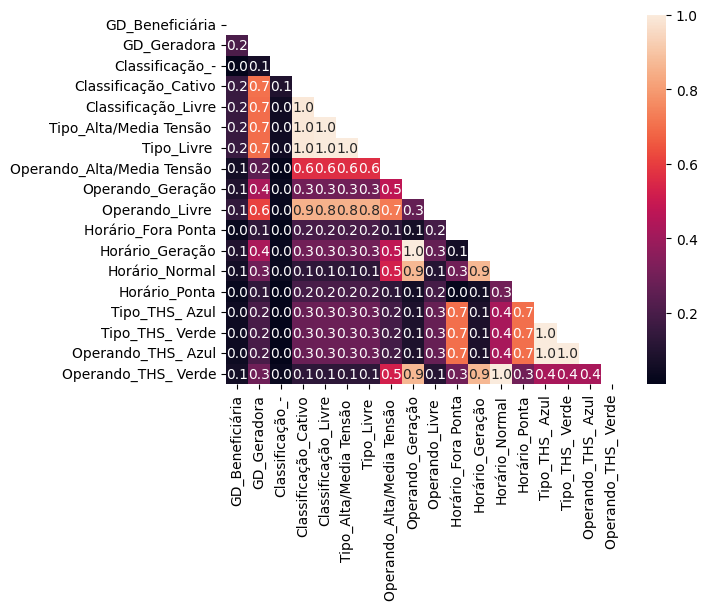

In [5]:
cor_matrix = X.corr(method="spearman").abs()
tri_lower = cor_matrix.where(np.tril(np.ones(cor_matrix.shape), k=-1).astype(bool))
sns.heatmap(tri_lower, annot=True, fmt="0.1f")
plt.show()

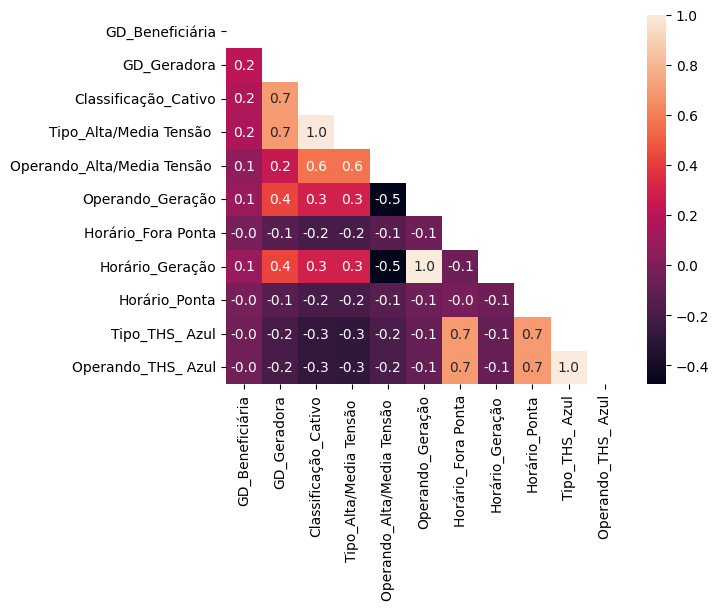

In [6]:
# X_pos = X.drop(["Classificação_-", "Tipo_Alta/Media Tensão ", "Tipo_THS_ Azul", "Operando_THS_ Azul"], axis=1)
X_pos = X.drop(["Classificação_-", "Classificação_Livre", "Tipo_Livre ", "Operando_Livre ", "Tipo_THS_ Verde", "Operando_THS_ Verde", "Horário_Normal"], axis=1)

cor_matrix = X_pos.corr(method="spearman")
tri_lower = cor_matrix.where(np.tril(np.ones(cor_matrix.shape), k=-1).astype(bool))
sns.heatmap(tri_lower, annot=True, fmt="0.1f")
plt.show()


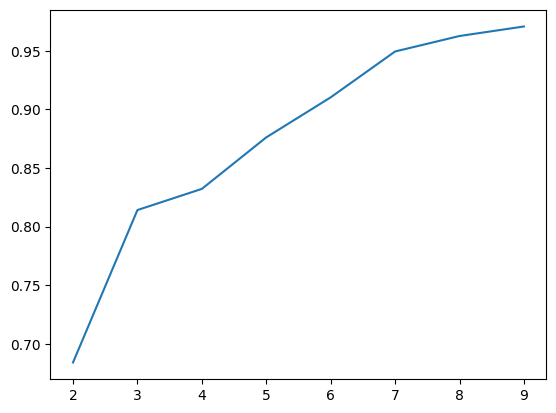

In [7]:
scores = []
for n_cluster in range(2,10):
    agg_clustering = AgglomerativeClustering(n_clusters=n_cluster)
    y_pred = agg_clustering.fit_predict(X_pos)
    distance_matrix = pairwise_distances(X_pos.astype(int), metric="hamming")
    score = silhouette_score(distance_matrix, y_pred, metric="precomputed")
    scores.append(score)

plt.plot(list(range(2,10)), scores)
plt.show()

0.6449313094549555


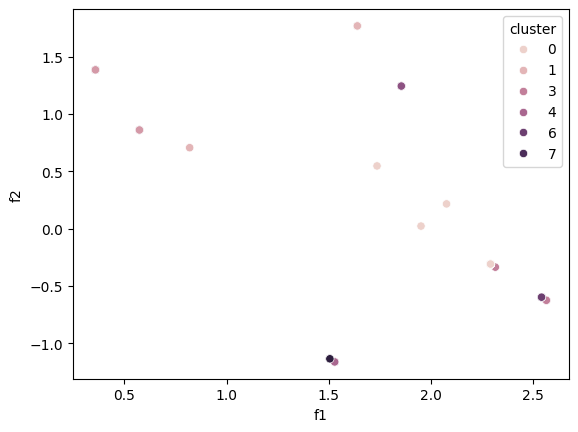

In [8]:
svd = TruncatedSVD(n_components=2, random_state=5)
X_reduced = pd.DataFrame(svd.fit_transform(X), columns=["f1", "f2"])
X_reduced["cluster"] = y_pred
print(svd.explained_variance_ratio_.sum())
sns.scatterplot(X_reduced, x="f1", y="f2", hue="cluster")
plt.show()

In [9]:

clustering = DBSCAN()
y_pred = clustering.fit_predict(X_pos)
distance_matrix = pairwise_distances(X_pos.astype(int), metric="hamming")
score = silhouette_score(distance_matrix, y_pred, metric="precomputed")
print(f"clusters {len(set(clustering.labels_))}")
print(score)



clusters 10
0.9733620824107232


In [10]:
data["cluster"] = y_pred

Cluster 0
Classificaçào: Cativo
Alta/Media Tensao
Alta/Media Tensao
Normal
Verde
Verde
Geradora


In [11]:
data.loc[data["cluster"]==0]

,Instalação,Classificação,Tipo,Operando,Horário,Demanda contratada (kW),Tipo_THS,Operando_THS,GD_Beneficiária,GD_Geradora,cluster
0,Cliente 80,Cativo,Alta/Media Tensão,Alta/Media Tensão,Normal,110.0,Verde,Verde,False,True,0
3,Cliente 82,Cativo,Alta/Media Tensão,Alta/Media Tensão,Normal,245.0,Verde,Verde,False,True,0
5,Cliente 1,Cativo,Alta/Media Tensão,Alta/Media Tensão,Normal,75.0,Verde,Verde,False,True,0
6,Cliente 52,Cativo,Alta/Media Tensão,Alta/Media Tensão,Normal,105.0,Verde,Verde,False,True,0
10,Cliente 55,Cativo,Alta/Media Tensão,Alta/Media Tensão,Normal,300.0,Verde,Verde,False,True,0
...,...,...,...,...,...,...,...,...,...,...,...
395,Cliente 321,Cativo,Alta/Media Tensão,Alta/Media Tensão,Normal,135.0,Verde,Verde,False,True,0
403,Cliente 314,Cativo,Alta/Media Tensão,Alta/Media Tensão,Normal,240.0,Verde,Verde,False,True,0
415,Cliente 329,Cativo,Alta/Media Tensão,Alta/Media Tensão,Normal,160.0,Verde,Verde,False,True,0
425,Cliente 264,Cativo,Alta/Media Tensão,Alta/Media Tensão,Normal,130.0,Verde,Verde,False,True,0


In [12]:
data.loc[data["cluster"]==1]

,Instalação,Classificação,Tipo,Operando,Horário,Demanda contratada (kW),Tipo_THS,Operando_THS,GD_Beneficiária,GD_Geradora,cluster
1,Cliente 80,Cativo,Alta/Media Tensão,Geração,Geração,75.0,Verde,NaN,False,True,1
13,Cliente 12,Cativo,Alta/Media Tensão,Geração,Geração,75.0,Verde,NaN,False,True,1
18,Cliente 15,Cativo,Alta/Media Tensão,Geração,Geração,75.0,Verde,NaN,False,True,1
21,Cliente 17,Cativo,Alta/Media Tensão,Geração,Geração,120.0,Verde,NaN,False,True,1
23,Cliente 18,Cativo,Alta/Media Tensão,Geração,Geração,39.0,Verde,NaN,False,True,1
32,Cliente 8,Cativo,Alta/Media Tensão,Geração,Geração,35.0,Verde,NaN,False,True,1
39,Cliente 27,Cativo,Alta/Media Tensão,Geração,Geração,73.0,Verde,NaN,False,True,1
42,Cliente 29,Cativo,Alta/Media Tensão,Geração,Geração,200.0,Verde,NaN,False,True,1
55,Cliente 34,Cativo,Alta/Media Tensão,Geração,Geração,1650.0,Verde,NaN,False,True,1
62,Cliente 10,Cativo,Alta/Media Tensão,Geração,Geração,40.0,Verde,NaN,False,True,1


In [13]:
data.loc[data["cluster"]==2]

,Instalação,Classificação,Tipo,Operando,Horário,Demanda contratada (kW),Tipo_THS,Operando_THS,GD_Beneficiária,GD_Geradora,cluster
2,Cliente 81,Livre,Livre,Livre,Normal,150.0,Verde,Verde,False,False,2
16,Cliente 14,Livre,Livre,Livre,Normal,120.0,Verde,Verde,False,False,2
19,Cliente 16,Livre,Livre,Livre,Normal,530.0,Verde,Verde,False,False,2
24,Cliente 19,Livre,Livre,Livre,Normal,500.0,Verde,Verde,False,False,2
26,Cliente 21,Livre,Livre,Livre,Normal,220.0,Verde,Verde,False,False,2
...,...,...,...,...,...,...,...,...,...,...,...
442,Cliente 346,Livre,Livre,Livre,Normal,210.0,Verde,Verde,False,False,2
443,Cliente 347,Livre,Livre,Livre,Normal,1000.0,Verde,Verde,False,False,2
445,Cliente 348,Livre,Livre,Livre,Normal,300.0,Verde,Verde,False,False,2
446,Cliente 349,Livre,Livre,Livre,Normal,500.0,Verde,Verde,False,False,2


In [14]:
data.loc[data["cluster"]==3]

,Instalação,Classificação,Tipo,Operando,Horário,Demanda contratada (kW),Tipo_THS,Operando_THS,GD_Beneficiária,GD_Geradora,cluster
4,Cliente 83,Cativo,Alta/Media Tensão,Alta/Media Tensão,Normal,110.0,Verde,Verde,False,False,3
11,Cliente 11,Cativo,Alta/Media Tensão,Alta/Media Tensão,Normal,35.0,Verde,Verde,False,False,3
30,Cliente 25,Cativo,Alta/Media Tensão,Alta/Media Tensão,Normal,30.0,Verde,Verde,False,False,3
33,Cliente 56,Cativo,Alta/Media Tensão,Alta/Media Tensão,Normal,140.0,Verde,Verde,False,False,3
36,Cliente 70,Cativo,Alta/Media Tensão,Alta/Media Tensão,Normal,50.0,Verde,Verde,False,False,3
...,...,...,...,...,...,...,...,...,...,...,...
423,Cliente 262,Cativo,Alta/Media Tensão,Alta/Media Tensão,Normal,225.0,Verde,Verde,False,False,3
424,Cliente 263,Cativo,Alta/Media Tensão,Alta/Media Tensão,Normal,76.0,Verde,Verde,False,False,3
431,Cliente 337,Cativo,Alta/Media Tensão,Alta/Media Tensão,Normal,80.0,Verde,Verde,False,False,3
432,Cliente 338,Cativo,Alta/Media Tensão,Alta/Media Tensão,Normal,115.0,Verde,Verde,False,False,3


In [15]:
data.loc[data["cluster"]==4]

,Instalação,Classificação,Tipo,Operando,Horário,Demanda contratada (kW),Tipo_THS,Operando_THS,GD_Beneficiária,GD_Geradora,cluster
7,Cliente 53,Cativo,Alta/Media Tensão,Alta/Media Tensão,Normal,95.0,Verde,Verde,True,True,4
35,Cliente 58,Cativo,Alta/Media Tensão,Alta/Media Tensão,Normal,90.0,Verde,Verde,True,True,4
71,Cliente 62,Cativo,Alta/Media Tensão,Alta/Media Tensão,Normal,86.0,Verde,Verde,True,True,4
99,Cliente 88,Cativo,Alta/Media Tensão,Alta/Media Tensão,Normal,85.0,Verde,Verde,True,True,4
118,Cliente 48,Cativo,Alta/Media Tensão,Alta/Media Tensão,Normal,140.0,Verde,Verde,True,True,4
129,Cliente 97,Cativo,Alta/Media Tensão,Alta/Media Tensão,Normal,111.0,Verde,Verde,True,True,4
168,Cliente 148,Cativo,Alta/Media Tensão,Alta/Media Tensão,Normal,145.0,Verde,Verde,True,True,4
189,Cliente 191,Cativo,Alta/Media Tensão,Alta/Media Tensão,Normal,80.0,Verde,Verde,True,True,4
200,Cliente 199,Cativo,Alta/Media Tensão,Alta/Media Tensão,Normal,132.0,Verde,Verde,True,True,4
214,Cliente 114,Cativo,Alta/Media Tensão,Alta/Media Tensão,Normal,330.0,Verde,Verde,True,True,4


In [16]:
data.loc[data["cluster"]==5]

,Instalação,Classificação,Tipo,Operando,Horário,Demanda contratada (kW),Tipo_THS,Operando_THS,GD_Beneficiária,GD_Geradora,cluster
8,Cliente 53,Cativo,Alta/Media Tensão,Geração,Geração,60.0,Verde,NaN,True,True,5
100,Cliente 88,Cativo,Alta/Media Tensão,Geração,Geração,NaN,Verde,NaN,True,True,5
130,Cliente 97,Cativo,Alta/Media Tensão,Geração,Geração,72.0,Verde,NaN,True,True,5
190,Cliente 191,Cativo,Alta/Media Tensão,Geração,Geração,75.0,Verde,NaN,True,True,5
215,Cliente 114,Cativo,Alta/Media Tensão,Geração,Geração,297.0,Verde,NaN,True,True,5
413,Cliente 318,Cativo,Alta/Media Tensão,Geração,Geração,75.0,Verde,NaN,True,True,5


In [17]:
data.loc[data["cluster"]==6]

,Instalação,Classificação,Tipo,Operando,Horário,Demanda contratada (kW),Tipo_THS,Operando_THS,GD_Beneficiária,GD_Geradora,cluster
9,Cliente 54,Livre,Livre,Alta/Media Tensão,Normal,112.0,Verde,Verde,False,False,6
15,Cliente 14,Livre,Livre,Alta/Media Tensão,Normal,120.0,Verde,Verde,False,False,6
37,Cliente 26,Livre,Livre,Alta/Media Tensão,Normal,258.0,Verde,Verde,False,False,6
43,Cliente 30,Livre,Livre,Alta/Media Tensão,Normal,285.0,Verde,Verde,False,False,6
49,Cliente 65,Livre,Livre,Alta/Media Tensão,Normal,130.0,Verde,Verde,False,False,6
51,Cliente 49,Livre,Livre,Alta/Media Tensão,Normal,100.0,Verde,Verde,False,False,6
59,Cliente 9,Livre,Livre,Alta/Media Tensão,Normal,160.0,Verde,Verde,False,False,6
66,Cliente 59,Livre,Livre,Alta/Media Tensão,Normal,64.0,Verde,Verde,False,False,6
145,Cliente 205,Livre,Livre,Alta/Media Tensão,Normal,280.0,Verde,Verde,False,False,6
149,Cliente 207,Livre,Livre,Alta/Media Tensão,Normal,250.0,Verde,Verde,False,False,6


In [18]:
data.loc[data["cluster"]==7]

,Instalação,Classificação,Tipo,Operando,Horário,Demanda contratada (kW),Tipo_THS,Operando_THS,GD_Beneficiária,GD_Geradora,cluster
97,Cliente 87,Livre,Livre,Livre,Fora Ponta,1420.0,Azul,Azul,False,False,7
239,Cliente 230,Livre,Livre,Livre,Fora Ponta,350.0,Azul,Azul,False,False,7
317,Cliente 219,Livre,Livre,Livre,Fora Ponta,1280.0,Azul,Azul,False,False,7
324,Cliente 238,Livre,Livre,Livre,Fora Ponta,150.0,Azul,Azul,False,False,7
332,Cliente 184,Livre,Livre,Livre,Fora Ponta,850.0,Azul,Azul,False,False,7
354,Cliente 273,Livre,Livre,Livre,Fora Ponta,2000.0,Azul,Azul,False,False,7
434,Cliente 340,Livre,Livre,Livre,Fora Ponta,2400.0,Azul,Azul,False,False,7
438,Cliente 343,Livre,Livre,Livre,Fora Ponta,2610.0,Azul,Azul,False,False,7


In [19]:
data.loc[data["cluster"]==8]

,Instalação,Classificação,Tipo,Operando,Horário,Demanda contratada (kW),Tipo_THS,Operando_THS,GD_Beneficiária,GD_Geradora,cluster
98,Cliente 87,Livre,Livre,Livre,Ponta,1270.0,Azul,Azul,False,False,8
240,Cliente 230,Livre,Livre,Livre,Ponta,180.0,Azul,Azul,False,False,8
319,Cliente 219,Livre,Livre,Livre,Ponta,1145.0,Azul,Azul,False,False,8
325,Cliente 238,Livre,Livre,Livre,Ponta,150.0,Azul,Azul,False,False,8
333,Cliente 184,Livre,Livre,Livre,Ponta,850.0,Azul,Azul,False,False,8
355,Cliente 273,Livre,Livre,Livre,Ponta,2000.0,Azul,Azul,False,False,8
435,Cliente 340,Livre,Livre,Livre,Ponta,2400.0,Azul,Azul,False,False,8
439,Cliente 343,Livre,Livre,Livre,Ponta,2460.0,Azul,Azul,False,False,8


In [20]:
# data.pivot_table(index="Instalação", columns="cluster", values="cluster")
data_pivot = pd.pivot_table(data, values="Demanda contratada (kW)", index="Instalação", columns="cluster")

data_pivot["total"] = data_pivot.count(axis=1)
data_pivot



cluster,-1,0,1,2,3,4,5,6,7,8,total
Instalação,,,,,,,,,,,
Cliente 1,NaN,75.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
Cliente 10,NaN,110.0,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
Cliente 100,NaN,140.0,75.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
Cliente 101,NaN,NaN,NaN,NaN,100.0,NaN,NaN,NaN,NaN,NaN,1
Cliente 102,NaN,73.0,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...
Cliente 95,NaN,180.0,180.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
Cliente 96,NaN,NaN,NaN,NaN,110.0,NaN,NaN,NaN,NaN,NaN,1
Cliente 97,NaN,NaN,NaN,NaN,NaN,111.0,72.0,NaN,NaN,NaN,2


In [21]:
data_pivot.to_excel("../data/processed/cliente_clusters_demanda.xlsx")

In [22]:
data.to_excel("../data/processed/cadastro_demanda_clusters.xlsx", index=False)